In [5]:
# Import the TensorFlow library for machine learning tasks
import tensorflow as tf

# Import specific modules from TensorFlow for working with datasets, layers, and models
from tensorflow.keras import datasets, layers, models

# Import the matplotlib library for data visualization
import matplotlib.pyplot as plt


In [6]:
# Load the CIFAR-10 dataset using the keras.datasets module
# The dataset consists of 60,000 32x32 color images in 10 different classes
# (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck)
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()


In [7]:
# Specify the target class (e.g., 0 for airplanes)
target_class = 0

# Filter training images and labels to only include the specified target class
train_images = train_images[train_labels.flatten() == target_class]
train_labels = train_labels[train_labels.flatten() == target_class]

# Filter test images and labels to only include the specified target class
test_images = test_images[test_labels.flatten() == target_class]
test_labels = test_labels[test_labels.flatten() == target_class]

# Normalize the pixel values of the images to the range [0, 1]
# This is a common preprocessing step for neural networks, making optimization more effective
train_images, test_images = train_images / 255.0, test_images / 255.0

# Display the number of training images after filtering
print(f"Number of training images for the target class: {train_images.shape[0]}")


Number of training images: 5000


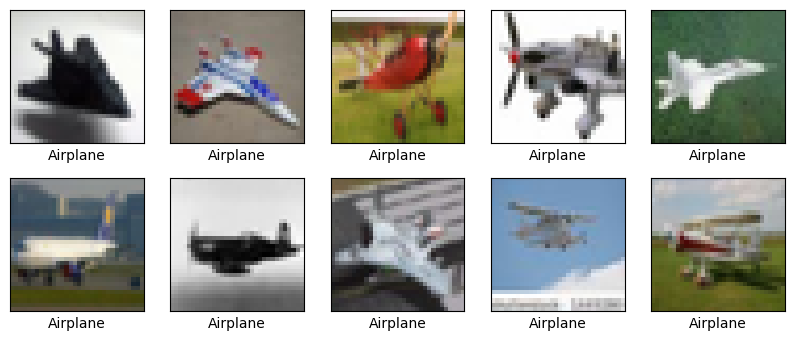

In [8]:
# Create a figure with a size of 10x4 inches to display 10 airplane images
plt.figure(figsize=(10, 4))

# Display 10 airplane images in a 2x5 grid
for i in range(10):
    # Subplot setup for each image
    plt.subplot(2, 5, i + 1)
    plt.xticks([])  # No x-axis ticks
    plt.yticks([])  # No y-axis ticks
    plt.grid(False)  # No grid lines

    # Display the airplane image using imshow and a binary color map
    plt.imshow(train_images[i], cmap=plt.cm.binary)

    # Set the x-axis label to 'Airplane'
    # Note: CIFAR labels are arrays, so we use an extra index [0]
    plt.xlabel('Airplane')

# Show the plot with the 10 airplane images
plt.show()


In [9]:
# Split the training data to 80% training, 20% validation
val_images = train_images[1000:]  # 1000 images for validation (20%)
val_labels = train_labels[1000:]
train_images = train_images[:4000]  # 4000 images for training (80%)
train_labels = train_labels[:4000]

In [10]:
# Create a Sequential model for binary image classification
model = models.Sequential([
    # Convolutional layer with 32 filters, each of size 3x3, using ReLU activation
    # Input shape is (32, 32, 3), representing the dimensions of the input images
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    
    # Max pooling layer with pool size 2x2 to reduce spatial dimensions
    layers.MaxPooling2D((2, 2)),
    
    # Second Convolutional layer with 64 filters, each of size 3x3, using ReLU activation
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    # Second Max pooling layer with pool size 2x2
    layers.MaxPooling2D((2, 2)),
    
    # Third Convolutional layer with 64 filters, each of size 3x3, using ReLU activation
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    # Flatten layer to convert 3D output to 1D before fully connected layers
    layers.Flatten(),
    
    # Dense (fully connected) layer with 64 units and ReLU activation
    layers.Dense(64, activation='relu'),
    
    # Output layer with 1 unit and sigmoid activation for binary classification
    layers.Dense(1, activation='sigmoid')
])


In [11]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [13]:
epochs = 10
history = model.fit(train_images, train_labels, epochs=epochs,
                    validation_data=(val_images, val_labels))


Epoch 1/10
125/125 [==============================] - 13s 96ms/step - loss: 0.0167 - accuracy: 0.9930 - val_loss: 9.4765e-19 - val_accuracy: 1.0000
Epoch 2/10
125/125 [==============================] - 9s 71ms/step - loss: 2.9050e-18 - accuracy: 1.0000 - val_loss: 9.4720e-19 - val_accuracy: 1.0000
Epoch 3/10
125/125 [==============================] - 11s 86ms/step - loss: 2.9048e-18 - accuracy: 1.0000 - val_loss: 9.4720e-19 - val_accuracy: 1.0000
Epoch 4/10
125/125 [==============================] - 10s 79ms/step - loss: 2.9048e-18 - accuracy: 1.0000 - val_loss: 9.4720e-19 - val_accuracy: 1.0000
Epoch 5/10
125/125 [==============================] - 14s 110ms/step - loss: 2.9048e-18 - accuracy: 1.0000 - val_loss: 9.4720e-19 - val_accuracy: 1.0000
Epoch 6/10
125/125 [==============================] - 9s 70ms/step - loss: 2.9048e-18 - accuracy: 1.0000 - val_loss: 9.4720e-19 - val_accuracy: 1.0000
Epoch 7/10
125/125 [==============================] - 13s 105ms/step - loss: 2.9048e-18 - acc

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

32/32 - 1s - loss: 1.3141e-21 - accuracy: 1.0000 - 634ms/epoch - 20ms/step
Test accuracy: 1.0


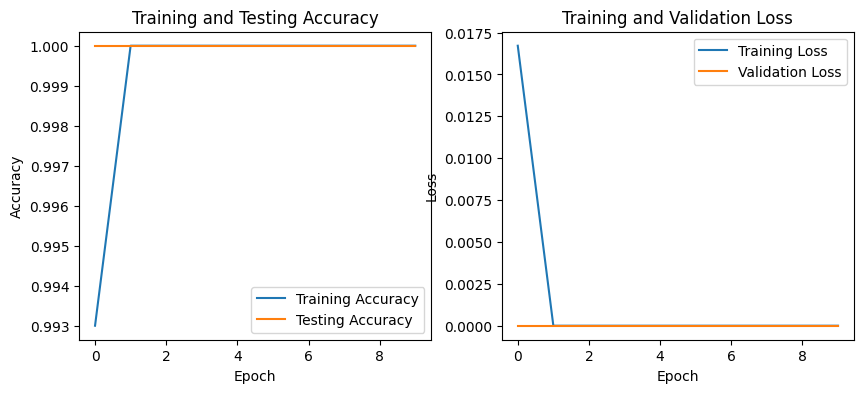

In [15]:
# Create a figure with a size of 10x4 inches for plotting training metrics
plt.figure(figsize=(10, 4))

# Subplot 1: Plot training and testing accuracy over epochs
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Subplot 2: Plot training and validation loss over epochs
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Display the plots
plt.show()
